#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model
from model_evaluation import evaluate_model, return_confusion_matrix
from model_details import model_summary, plot_metrics

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, Dropout, MaxPooling2D
from tensorflow import keras


In [22]:
def main ():
    def set_function_parameters (model_layers = {}, compiler_settings = {}, fit_settings = {}, evaluation_settings = {}):
        from tensorflow.keras.datasets import cifar10

        data_model = create_pipeline ([get_data, 
                                       get_train_test_data,
                                       normalise_data, 
                                       create_model (**model_layers), 
                                       compile_model2 (**compiler_settings), 
                                       train_model (**fit_settings), 
                                       evaluate_model (**evaluation_settings),
                                       return_confusion_matrix (),
                                       plot_metrics
                                       ])
        
        data_n_model = data_model (cifar10)

        return data_n_model
    
    return set_function_parameters

Model compiled for compile_model2
Start model training.
Epoch 1/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.7289 - sparse_categorical_accuracy: 0.3710 - val_loss: 1.3796 - val_sparse_categorical_accuracy: 0.5216
Epoch 2/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.4236 - sparse_categorical_accuracy: 0.4827 - val_loss: 1.2378 - val_sparse_categorical_accuracy: 0.5552
Epoch 3/5
1250/1250 [==============================] - 139s 111ms/step - loss: 1.3198 - sparse_categorical_accuracy: 0.5258 - val_loss: 1.1349 - val_sparse_categorical_accuracy: 0.6138
Epoch 4/5
1250/1250 [==============================] - 140s 112ms/step - loss: 1.2390 - sparse_categorical_accuracy: 0.5556 - val_loss: 1.0741 - val_sparse_categorical_accuracy: 0.6227
Epoch 5/5
1250/1250 [==============================] - 137s 110ms/step - loss: 1.1741 - sparse_categorical_accuracy: 0.5784 - val_loss: 1.0562 - val_sparse_categorical_accuracy: 0.6311
Completed model tra

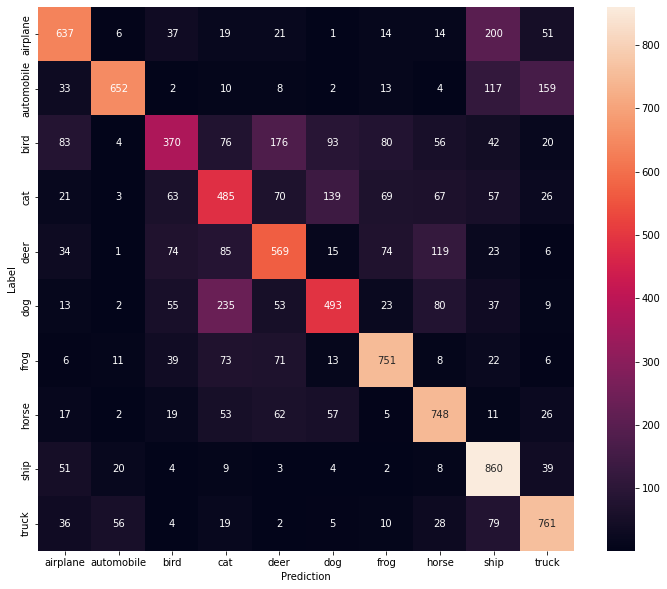

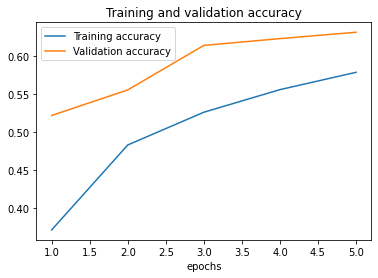

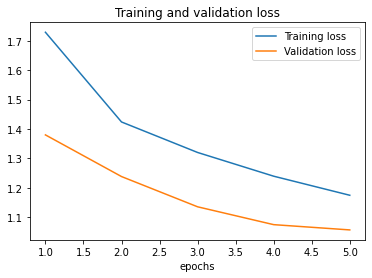

In [23]:
test_run = main () (model_layers = {'input_layer': Input (shape = (32, 32, 3)),
                                    'hidden_layers': [Conv2D (32, kernel_size = (3, 3), activation = "relu"),
                                                    Conv2D (64, kernel_size = (3, 3), activation = "relu"),
                                                    MaxPooling2D (pool_size = (2, 2)),
                                                    Dropout (0.25),
                                                    Flatten (),
                                                    Dense (64, activation = "relu"),
                                                    Dropout (0.5),
                                                    Dense (10, activation = "softmax")
                                                    ]
                                    },
                    compiler_settings = {'optimizer': "Adam",
                                         'loss': "sparse_categorical_crossentropy",
                                         'metrics': ["sparse_categorical_accuracy"]
                                         },
                    fit_settings = {'batch_size': 32,
                                    'epochs': 5,
                                    'validation_split': 0.2
                                    }
                    )

This function runs automatically once the parameters are set.